In [117]:
from PIL import Image
from utils import vis2arr, ir2arr
import matplotlib.pyplot as plt
import cv2
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = (10, 10)

In [76]:
vis_img = Image.open("test_images/1594774387vis.jpg")
ir_img = Image.open("test_images/1594774387ir.png")

vis_arr = vis2arr(vis_img)
ir_arr = ir2arr(ir_img)

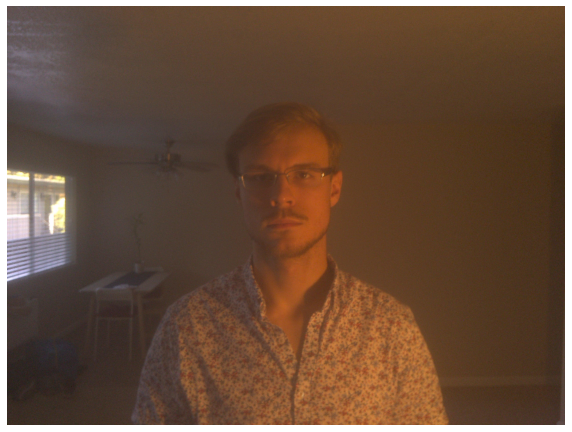

In [77]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(vis_arr)

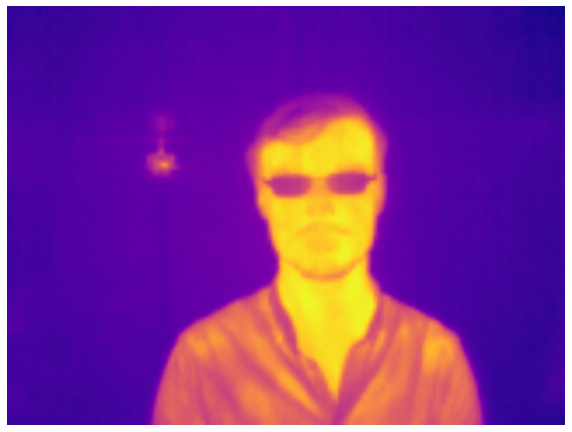

In [78]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(ir_arr, cmap='plasma')
plt.savefig('test_images/1594774387plasma.png', bbox_inches=0)

# 2. Registration

# 3. IR Detection

In [118]:
def detect_ir(ir_arr, thr):
    """
    Detects objects above thr temperature in ir array
    :param ir_arr: ir array in deg. C
    :param thr: threshold temperature in deg. C
    """
    
    mask = ir_arr>thr
    contours, _ = cv.findContours(mask.astype(np.uint8), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    bboxes = []
    for c in contours:
        polygon = cv.approxPolyDP(c, 3, True)
        bbox = cv.boundingRect(polygon)
        bboxes.append(bbox)
    
    return bboxes

def drop_small_bboxes(bboxes, min_size=10):
    good = []
    for (x, y, dx, dy) in bboxes:
        if dx*dy > min_size:
            good.append((x, y, dx, dy))
    return good

def overlay_bboxes(arr, bboxes):
    m = int(arr.max())
    COL = (m, m, m)
    for (x, y, dx, dy) in bboxes:
        p1 = (x,y)
        p2 = (x+dx, y+dy)
        cv2.rectangle(arr,
                      p1,
                      p2,
                      color=COL,
                      thickness=2)
    return arr

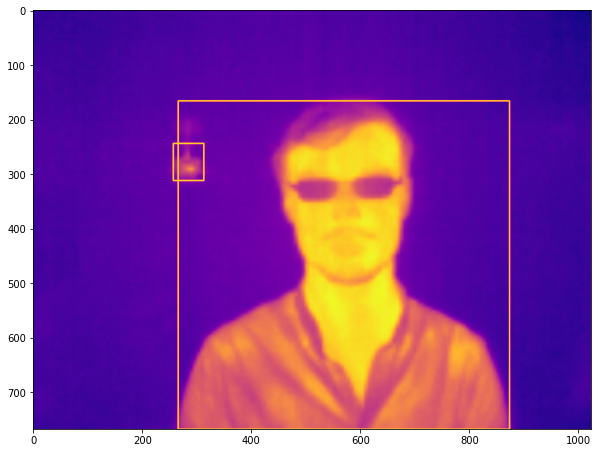

In [120]:
bboxes = detect_ir(ir_arr, 42)
bboxes = drop_small_bboxes(bboxes)
ir_overlay = overlay_bboxes(ir_arr.copy(), bboxes)
plt.imshow(ir_overlay, cmap='plasma')

In [12]:
THR = 42
ir_outline = ir_arr.copy()
mask = ir_outline>THR
# ir_outline[mask]

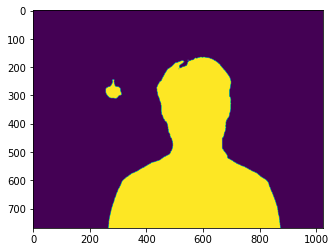

In [15]:
plt.imshow(mask)

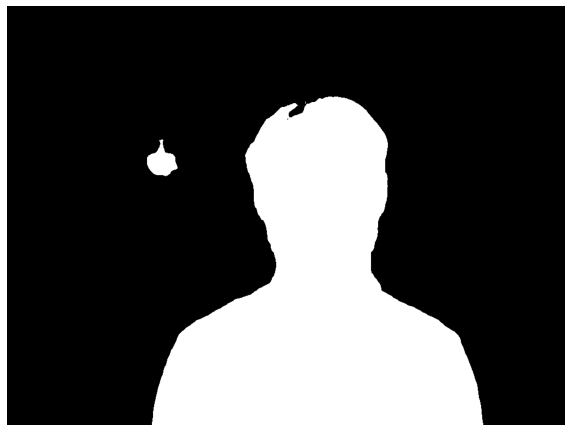

In [9]:
def detect_ir():
    ir_outline = ir_arr.copy()
    mask = ir_outline>42
    # ir_outline[mask]
    
    return bboxes

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(mask, cmap='binary_r')
plt.savefig('test_images/1594774387thr.png')

# 4.RGB Detection

In [ ]:
# for fname in sorted(os.listdir('test_images'), reverse=True)[:2]:
#     arr = np.load('test_images/' + fname, allow_pickle=True)
#     print(fname)
# #     plt.figure(figsize=(10,10))
#     plt.imshow(arr, cmap='gray')
#     plt.show()

# DETR

In [ ]:
import torch
import torchvision.transforms as T
from rgb.detr import DETRdemo, detect

detr = DETRdemo(num_classes=91)
state_dict = torch.hub.load_state_dict_from_url(
    url='https://dl.fbaipublicfiles.com/detr/detr_demo-da2a99e9.pth',
    map_location='cuda', check_hash=True)

detr.load_state_dict(state_dict)
detr.eval()
detr = detr.to('cuda')

transform = T.Compose([
    T.Resize((800,600)),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [ ]:
%timeit scores, boxes = detect(rgb_img, detr, transform)

In [ ]:
from rgb.detr import overlay_bboxes

img_bboxes = overlay_bboxes(rgb_img,scores, boxes)

# SSD

In [ ]:
import torch
precision = 'fp32'
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd', model_math=precision)


In [ ]:
detr

In [ ]:
ssd_model.to('cuda')
ssd_model.eval()

In [ ]:
img_bboxes

In [ ]:
boxes

In [ ]:
face_cascade = cv2.CascadeClassifier("/usr/share/opencv4/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/usr/share/opencv4/haarcascades/haarcascade_eye.xml")

def detect_faces_haar(gray_arr, face_clf, eye_clf):
    """
    :param gray_arr: np grayscale aray with the image
    :param fc: cv2.CascadeClassifier object for face classification
    :param ec: cv2.CascadeClassifier object for eye classification
    """

    detections = []
    faces = face_clf.detectMultiScale(gray_arr, 1.3, 5)

    for face in faces:
        (x, y, w, h) = face
        roi = gray_arr[y : y + h, x : x + w]
        # perform eye classification
        eyes = eye_clf.detectMultiScale(roi)  

        detections.append((face, eyes))

    return detections

In [ ]:
def save_as(arr, fname):
    Image.fromarray(arr).save(fname)
    

In [ ]:
ir_img = get_ir_image()
rgb_img = get_rgb_image()

In [ ]:
vis_arr = np.array(rgb_img)

In [ ]:
ir_arr = np.load("test_images/1594681158ir.npy")
vis_arr = np.load("test_images/1594681139rgb.npy")

In [ ]:
ir_arr_n = normalize_ir(ir_arr)
mask = ir_arr > 32

In [ ]:
save_as(ir_arr_n, 'results/input_ir.png')
save_as(vis_arr, 'results/input_vis.png')
save_as(mask, 'results/thr_mask.png')

In [ ]:
plt.imshow(mask, cmap='binary_r')

In [ ]:
vis_masked = vis_arr.copy()
vis_masked[~mask] = 0
plt.imshow(vis_masked)

In [ ]:
plt.imshow(vis_arr)

In [ ]:
d = detect_faces_haar(vis_arr, face_cascade, eye_cascade)

In [ ]:
FACE_BB_COLOR = (255, 255, 255) # white
EYES_BB_COLOR = (0,   255, 255) # yellow

def overlay_bboxes(arr, detections):

    for (face, eyes) in detections:

        print(face)
        x, y, w, h = face

        # draw face bounding box
        cv2.rectangle(arr, (x, y), (x + w, y + h), FACE_BB_COLOR, 2)

        # draw facial temperature
        cv2.putText(
            arr,
            text=f"twarz",
            org=(x,y),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1,
            color=(255, 255, 255),
            thickness=2
        )

        roi = arr[y : y + h, x : x + w]

        for (ex, ey, ew, eh) in eyes:
            # draw eye bouding box
            cv2.rectangle(roi, (ex, ey), (ex + ew, ey + eh), EYES_BB_COLOR, 2)

    return arr

In [ ]:
vis_arr = cv

In [ ]:
a = overlay_bboxes(vis_arr, d)

In [ ]:
d

In [ ]:
from PIL import Image
import requests
from io import BytesIO

url = 'https://cdn.britannica.com/s:800x450,c:crop/43/172743-138-545C299D/overview-Barack-Obama.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))

In [ ]:
detect_faces_haar(vis_arr, face_cascade, eye_cascade)

In [ ]:
rgb_arr = np.load('test_images/' + '1594651833rgb.npy')